In [14]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [15]:
# 加载数据
file_path_Mix_dataset_One_Hot = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot.csv"
file_path_Mix_dataset_Label_Encoding = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding.csv"
# 加载数据
final_data = pd.read_csv(file_path_Mix_dataset_Label_Encoding, header=0)
final_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,-0.132017,-0.719829,0.733734,0
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,2.235956,0.753338,0.733734,0
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,-0.132017,1.060247,-0.707737,1
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,-0.132017,-0.474301,0.733734,0
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,-0.132017,-0.474301,0.733734,0


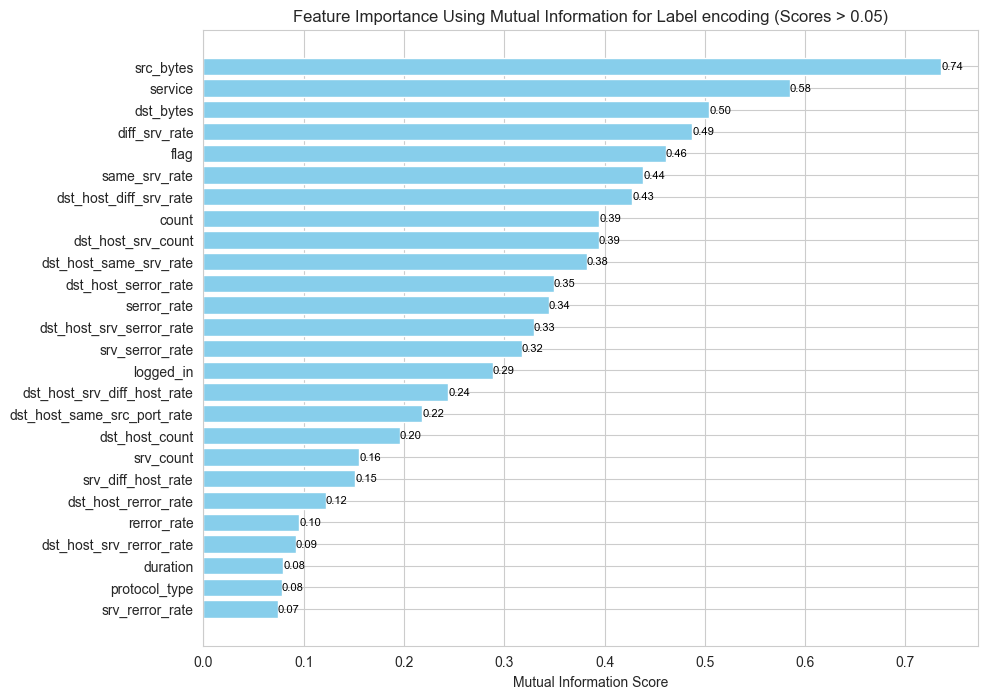

In [16]:
from sklearn.feature_selection import mutual_info_classif

# 假设 final_data 是您已经有的DataFrame
X = final_data.iloc[:, :-1].values  # 特征数据
y = final_data.iloc[:, -1].values   # 标签数据，已经是编码后的

# 计算特征的互信息得分
mi_scores = mutual_info_classif(X, y)

# 创建特征名称列表，假设最后一列是标签
feature_names = final_data.columns[:-1]

# 创建互信息得分的DataFrame，并排序
mi_scores_df = pd.DataFrame(mi_scores, index=feature_names, columns=['MI Scores'])
mi_scores_df = mi_scores_df.sort_values(by='MI Scores', ascending=True)

# 筛选MI分数大于0.1的特征
filtered_mi_scores_df = mi_scores_df[mi_scores_df['MI Scores'] > 0.05]

# 绘制条形图，只显示MI分数大于0.1的特征
plt.figure(figsize=(10, 8))  # 可以根据实际需要调整尺寸
bars = plt.barh(np.arange(len(filtered_mi_scores_df)), filtered_mi_scores_df['MI Scores'], color='skyblue')

# 在条形图后面添加文本显示MI分数
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f"{bar.get_width():.2f}", 
             va='center', ha='left', fontsize=8, color='black')

plt.yticks(np.arange(len(filtered_mi_scores_df)), filtered_mi_scores_df.index)
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance Using Mutual Information for Label encoding (Scores > 0.05)')
plt.show()

In [17]:
# 设置互信息得分的阈值
threshold = 0.05  # 根据需要调整这个阈值
# 选择得分高于阈值的特征
selected_features_df = mi_scores_df[mi_scores_df['MI Scores'] > threshold]
# 打印被选中的特征及其互信息得分
print(selected_features_df)
# 只需要特征名称列表
selected_features = selected_features_df.index.tolist()
print("Selected features based on threshold:", selected_features)

                             MI Scores
srv_rerror_rate               0.074038
protocol_type                 0.078226
duration                      0.079702
dst_host_srv_rerror_rate      0.092095
rerror_rate                   0.095508
dst_host_rerror_rate          0.122133
srv_diff_host_rate            0.151687
srv_count                     0.155447
dst_host_count                0.195900
dst_host_same_src_port_rate   0.218025
dst_host_srv_diff_host_rate   0.243951
logged_in                     0.288528
srv_serror_rate               0.317673
dst_host_srv_serror_rate      0.329303
serror_rate                   0.344260
dst_host_serror_rate          0.349358
dst_host_same_srv_rate        0.382212
dst_host_srv_count            0.394099
count                         0.394865
dst_host_diff_srv_rate        0.427552
same_srv_rate                 0.438554
flag                          0.460936
diff_srv_rate                 0.487231
dst_bytes                     0.504561
service                  

In [18]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = final_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)
print('highest_corr:',highest_corr)
selected_features = highest_corr.index.tolist()
print("Corr features based on threshold:", selected_features)

highest_corr: logged_in                 0.504606
same_srv_rate             0.415960
dst_host_srv_count        0.551977
dst_host_same_srv_rate    0.459668
dst_host_diff_srv_rate    0.355136
flag                      0.425697
label                     1.000000
Name: label, dtype: float64
Corr features based on threshold: ['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'flag', 'label']


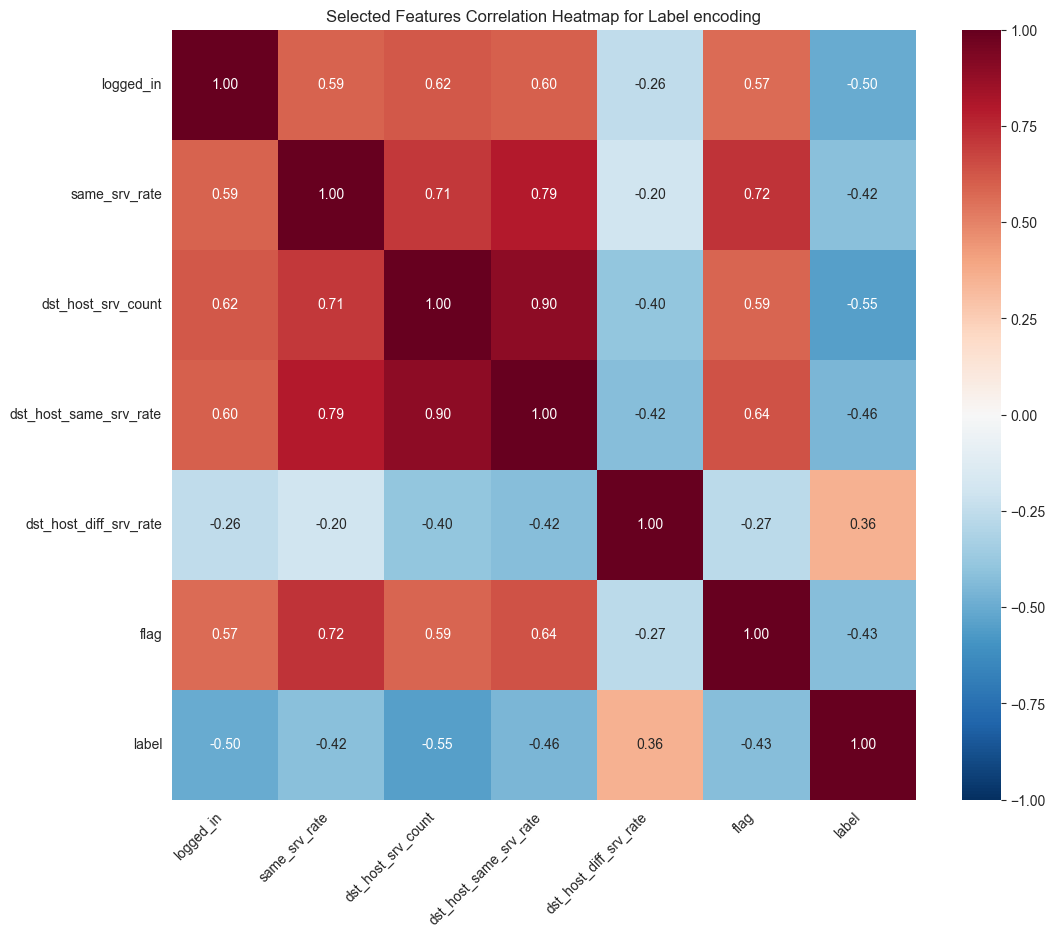

In [20]:
# 假设你只对特定的几个特征感兴趣
interested_features = ['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'flag', 'label']
# 从完整的相关系数矩阵中提取这些特征的相关系数
selected_corr = corr.loc[interested_features, interested_features]
# 设置一个较大的图形尺寸，以便于查看
plt.figure(figsize=(12, 10))
# 创建一个没有注释且以红色渐变表示的热图
# annot=False 代表不显示每个单元格的数值
# cmap='Reds' 使用红色的颜色渐变
sns.heatmap(selected_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0, vmin=-1, vmax=1)
# 调整x轴和y轴的标签，使其更易读
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# 设置图形标题
plt.title('Selected Features Correlation Heatmap for Label encoding')
# 显示图形
plt.show()

In [25]:
# One_Hot_MI = final_data[['service_eco_i', 'srv_rerror_rate', 'duration', 'dst_host_srv_rerror_rate', 'rerror_rate', 'service_private', 'dst_host_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'dst_host_count', 'service_http', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'logged_in', 'srv_serror_rate', 'flag_S0', 'dst_host_srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'flag_SF', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_diff_srv_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_bytes', 'src_bytes','label']]
# One_Hot_Pearson = final_data[['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'service_http', 'service_private', 'flag_SF', 'label']]
Label_Encoding_MI = final_data[['srv_rerror_rate', 'protocol_type', 'duration', 'dst_host_srv_rerror_rate', 'rerror_rate', 'dst_host_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'dst_host_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'logged_in', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_diff_srv_rate', 'same_srv_rate', 'flag', 'diff_srv_rate', 'dst_bytes', 'service', 'src_bytes', 'label']]
Label_Encoding_Pearson = final_data[['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'flag', 'label']]
Label_Encoding_Pearson.head()

,logged_in,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,flag,label
0,-0.821249,0.749108,-0.849240,-0.813554,-0.278736,0.733734,0
1,-0.821249,-1.358363,-1.065006,-1.192968,2.657874,0.733734,0
2,-0.821249,-1.427085,-0.840250,-0.969783,-0.175697,-0.707737,1
3,1.217658,0.749108,1.218511,1.038878,-0.433294,0.733734,0
4,1.217658,0.749108,1.218511,1.038878,-0.433294,0.733734,0


In [26]:
# 指定文件路径和文件名
file_path = r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_Pearson.csv'  # 
Label_Encoding_Pearson.to_csv(file_path, index=False) 
# index=False表示不保存行索引到文件
# 输出文件路径，确认保存成功
file_path

'D:\\Download\\zyFile\\Cyberthreat_Cognitive_System\\CTCS_Code\\attack_datasets\\NSL-KDD\\Mix_dataset_Label_Encoding_Pearson.csv'